**© 2020 NUS. All Rights Reserved. The contents contained in this document may not be reproduced in any form or by any means, without the written permission of Institute of Systems Science, National University of Singapore, other than for the purpose for which it has been supplied.**

## Health Analytics - Excercise 1b: Prediciting Stroke

In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ex1b Stroke Processed3.csv to Ex1b Stroke Processed3.csv


In [3]:
import io
procCleanData = pd.read_csv(io.BytesIO(uploaded['Ex1b Stroke Processed3.csv']))

## Predicting Stroke  ##

In [4]:
procCleanData

gender   age  hypertension  ...  avg_glucose_level   bmi stroke
0       Male   3.0             0  ...              95.12  18.0      0
1     Female  65.0             1  ...              75.70  41.8      0
2     Female  38.0             0  ...              97.49  26.9      0
3     Female  47.0             0  ...             103.26  25.4      0
4       Male  59.0             0  ...             117.92  29.4      0
...      ...   ...           ...  ...                ...   ...    ...
4189    Male  57.0             0  ...              81.08  22.6      0
4190    Male  62.0             1  ...              77.97  31.5      1
4191    Male  71.0             1  ...             184.38  36.3      0
4192    Male   2.0             0  ...              75.76  38.0      0
4193  Female  46.0             0  ...              88.66  34.5      0

[4194 rows x 10 columns]

In [5]:
procCleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4194 non-null   object 
 1   age                4194 non-null   float64
 2   hypertension       4194 non-null   int64  
 3   heart_disease      4194 non-null   int64  
 4   ever_married       4194 non-null   object 
 5   work_type          4194 non-null   object 
 6   Residence_type     4194 non-null   object 
 7   avg_glucose_level  4194 non-null   float64
 8   bmi                4194 non-null   float64
 9   stroke             4194 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 327.8+ KB


In [6]:
#What's the class percentage?
procCleanData['stroke'].value_counts()

0    3551
1     643
Name: stroke, dtype: int64

In [8]:
print("Percentage of stroke incidence:", '%.2f'%(procCleanData['stroke'].value_counts()[1]/len(procCleanData)*1000),'%')
print("Percentage of non-stroke incidence:", '%.2f'%(procCleanData['stroke'].value_counts()[0]/len(procCleanData)*1000),'%')

Percentage of stroke incidence: 153.31 %
Percentage of non-stroke incidence: 846.69 %


In [9]:
#encoding categorial variables
dummyData=pd.get_dummies(data=procCleanData,columns=['gender','ever_married','work_type','Residence_type'],drop_first=True)

In [10]:
dummyData

age  hypertension  ...  work_type_children  Residence_type_Urban
0      3.0             0  ...                   1                     0
1     65.0             1  ...                   0                     0
2     38.0             0  ...                   0                     0
3     47.0             0  ...                   0                     1
4     59.0             0  ...                   0                     1
...    ...           ...  ...                 ...                   ...
4189  57.0             0  ...                   0                     1
4190  62.0             1  ...                   0                     0
4191  71.0             1  ...                   0                     1
4192   2.0             0  ...                   1                     0
4193  46.0             0  ...                   0                     0

[4194 rows x 13 columns]

In [12]:
inDummyData = dummyData.drop(["stroke"], axis = 1)

In [13]:
inDummyData

age  hypertension  ...  work_type_children  Residence_type_Urban
0      3.0             0  ...                   1                     0
1     65.0             1  ...                   0                     0
2     38.0             0  ...                   0                     0
3     47.0             0  ...                   0                     1
4     59.0             0  ...                   0                     1
...    ...           ...  ...                 ...                   ...
4189  57.0             0  ...                   0                     1
4190  62.0             1  ...                   0                     0
4191  71.0             1  ...                   0                     1
4192   2.0             0  ...                   1                     0
4193  46.0             0  ...                   0                     0

[4194 rows x 12 columns]

In [40]:
trainInput2, testInput2, trainOutput2 ,testOutput2 = train_test_split(inDummyData.values,dummyData["stroke"].values, test_size = 0.20,random_state=123)

In [41]:
#What is the results of the different metrices?
LRModel2 = LogisticRegression()
LRModel2.fit(trainInput2,trainOutput2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predTrain2 = LRModel2.predict(trainInput2)
predTest2 = LRModel2.predict(testInput2)

In [ ]:
print('Training Accuracy Percentage =',metrics.accuracy_score(predTrain2, trainOutput2)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(predTest2, testOutput2)*100)

In [43]:
trainCM2=confusion_matrix(trainOutput2,predTrain2)
trainCM2

array([[2734,  103],
       [ 381,  137]])

In [44]:
#Precision=tp/(tp+fp)
print('Precision =', trainCM2[1,1]/(trainCM2[1,1]+trainCM2[0,1]))

Precision = 0.5708333333333333


In [45]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',trainCM2[0,0]/(trainCM2[0,0]+trainCM2[0,1]) )

Specificity = 0.9636940430031724


In [46]:
#Recall=tp/(tp+fn)
print('Recall/True Positive Rate/Sensitivity =', trainCM2[1,1]/(trainCM2[1,1]+trainCM2[1,0]))

Recall/True Positive Rate/Sensitivity = 0.2644787644787645


In [47]:
#Try it out: Repeat for the testing dataset, what's the performance?

In [53]:
testCM2 = confusion_matrix(testOutput2,predTest2)


In [54]:
print('Precision =', testCM2[1,1]/(testCM2[1,1]+testCM2[0,1]))

Precision = 0.5517241379310345


In [55]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',testCM2[0,0]/(testCM2[0,0]+testCM2[0,1]) )

Specificity = 0.9635854341736695


In [56]:
#Recall=tp/(tp+fn)
print('Recall/True Positive Rate/Sensitivity =', testCM2[1,1]/(testCM2[1,1]+testCM2[1,0]))

Recall/True Positive Rate/Sensitivity = 0.256


## Prediciting Stroke with a Understandable Model - Decision Tree 

In [23]:
attributes=list(inDummyData.columns)

In [24]:
DT = DecisionTreeClassifier()

In [25]:
DT = DT.fit(trainInput2,trainOutput2)


In [26]:
trainPredict = DT.predict(trainInput2)
testPredict = DT.predict(testInput2)

In [27]:
print('Training Accuracy Percentage =',metrics.accuracy_score(trainPredict, trainOutput2)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(testPredict, testOutput2)*100)
#overfitting may occur
#lower testing performance than Logistic


Training Accuracy Percentage = 100.0
Testing Accuracy Percentage = 79.02264600715138


In [28]:
# Draw out the tree
data = io.StringIO()
export_graphviz(DT, out_file=data,  
                filled=True,feature_names = attributes,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())

In [ ]:
#Try it out using a smaller tree 

In [29]:
DT2 = DecisionTreeClassifier(max_depth=3)

In [30]:
DT2 = DT2.fit(trainInput2,trainOutput2)

In [35]:
trainPredict2 = DT2.predict(trainInput2)
testPredict2 = DT2.predict(testInput2)

In [36]:
print('Training Accuracy Percentage =',metrics.accuracy_score(trainPredict2, trainOutput2)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(testPredict2, testOutput2)*100)
#overfitting may occur
#lower testing performance than Logistic

Training Accuracy Percentage = 85.57377049180329
Testing Accuracy Percentage = 85.10131108462456


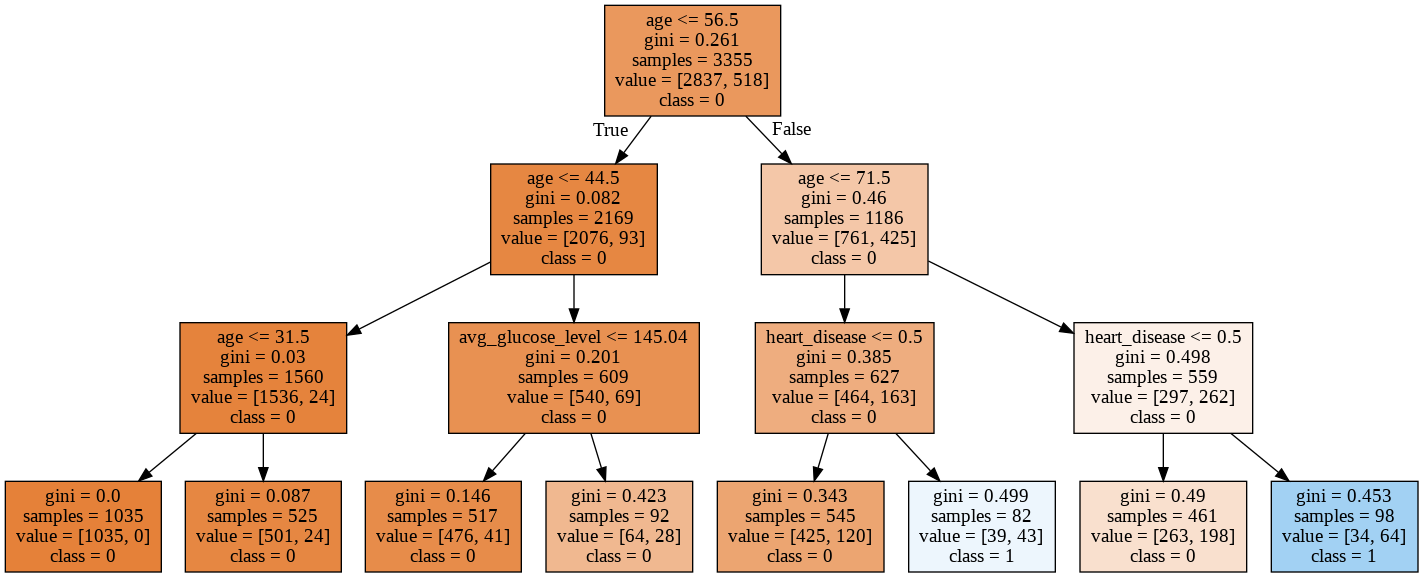

In [37]:
# Draw out the tree
data2 = io.StringIO()
export_graphviz(DT2, out_file=data2,  
                filled=True,feature_names = attributes,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data2.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())

-----------------------------------

-----------------